# Introduction to Tensorflow Regression

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Creating Dataset

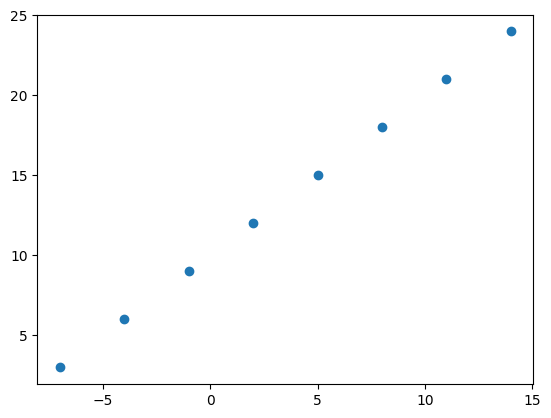

In [4]:
# Create features
X = np.arange(-7,15,3,dtype=np.float16)

# Create labels
y = np.arange(3,25,3,dtype=np.float16)

# Visualize
plt.scatter(X,y)

In [5]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [6]:
# Input and Output Shapes
X.shape, y.shape

((8,), (8,))

In [7]:
# Shape of one input element
X[0].shape

# Shape of one output element
y[0].shape

# NOTE: The shape is () since we are dealing with tensors

()

In [8]:
# Scalars have dimension 0
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

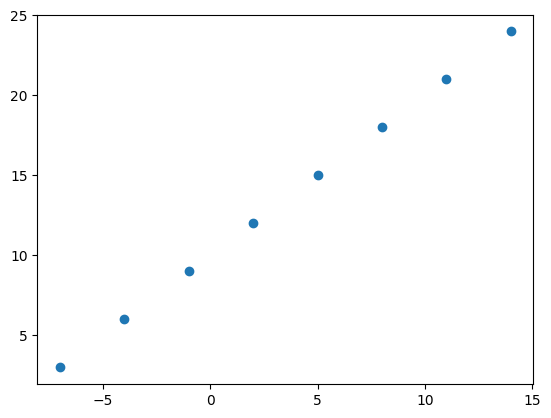

In [11]:
plt.scatter(X,y)

### Modelling with TF  - Experiment, Experiment, Experiment
1. Creating a model - define input and output layers, and the hidde layers of the NN
2. Compiling the model - Define the loss functions, optimizer and evaluation metrics
3. Fitting the model - Letting the model find the patterns between X & y (Features and labels)

Method 1:
- Add layers after creating a model from Sequential class

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with Sequential
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 11.1068 - mae: 11.1068
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 10.9743 - mae: 10.9743
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 10.8418 - mae: 10.8418
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 10.7093 - mae: 10.7093
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 10.5768 - mae: 10.5768
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 10.4443 - mae: 10.4443
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 10.3118 - mae: 10.3118
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 10.1793 - mae: 10.1793
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 10.0468 - mae: 10.0468
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 9.9143 - mae: 9.9143


Method 2:
- Add the layers in the Sequential API while creating the model itself

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = (1,)) # It is 1, since we pass only 1 data pt
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 168ms/step - loss: 18.5034 - mae: 18.5034
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 18.2222 - mae: 18.2222
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 17.9409 - mae: 17.9409
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 17.6597 - mae: 17.6597
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 17.3784 - mae: 17.3784
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 17.0972 - mae: 17.0972
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 16.8159 - mae: 16.8159
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 16.5347 - mae: 16.5347
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 16.2534 - mae: 16.2534
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 15.9722 - mae: 15.9722


#### Predict using the trained Model

In [14]:
model_1.predict([17.0]), model_2.predict([17.0])

1/1 [==============================] - 0s 47ms/step


(array([[17.674177]], dtype=float32), array([[-9.6301775]], dtype=float32))

### Improving the Model
- We can improve our model by modifying the steps we took to create a model

1. **Creating a model** 
    - Add more layers
    - Increase the number of neurons in the layers
    - Change the activation function in a each layer
2. **Compiling a model**
    - Change the optimizer
    - Change the loss function
    - Change the *learning rate* of optimizer
3. **Fitting a model**
    - Change the number of epochs
    - Provide more data to learn from

In [15]:
# Changes: Increase number of epochs

# 1. create the model
improv_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit the model
improv_model1.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 171ms/step - loss: 9.7214 - mae: 9.7214
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 9.5889 - mae: 9.5889
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4564 - mae: 9.4564
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.3239 - mae: 9.3239
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.1914 - mae: 9.1914
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0589 - mae: 9.0589
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9264 - mae: 8.9264
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7939 - mae: 8.7939
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.6614 - mae: 8.6614
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5289 - mae: 8.5289
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 8.396

In [16]:
improv_model1.predict([17.0])

1/1 [==============================] - 0s 50ms/step


array([[29.858072]], dtype=float32)

##### `NOTE`: Common ways to better our DL model:
- Increase number of layers
- Increase anumber of neurons in each layer
- Change optimizer
- Change Learning Rate (The most hyperparam for most NN)
- Fitting on more data
- Fitting for more epochs

In [17]:
# Changes: improv1 + hidden layer with 50 layers + Cha

# 1. Create a model
improv_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improv_model2.compile(loss = tf.losses.mae,
                        optimizer = tf.optimizers.Adam(0.01),
                        metrics = ["mae"])

# 3. Fit the model
improv_model2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 13.9486 - mae: 13.9486
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3295 - mae: 13.3295
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7166 - mae: 12.7166
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.1080 - mae: 12.1080
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.5000 - mae: 11.5000
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8895 - mae: 10.8895
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2735 - mae: 10.2735
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6489 - mae: 9.6489
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0122 - mae: 9.0122
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3598 - mae: 8.3598
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [18]:
improv_model2.predict([17.0])

# Though our loss is lesser than before, its prediction is worse. This is due to overfitting.
# Hence, our model has trained really well on training data, but on unseen data, its results are not good

1/1 [==============================] - 0s 59ms/step


array([[26.724403]], dtype=float32)

### Evaluating a Model - Visualize, Visualize, Visualize
* Visualize the data - What is the data you are working with? How does it look?
* Visualize the model - What does our model look like?
* Training of model - How does the model look while training?
* Predictions of model - How the predictions of the model compare to the ground truth?


In [19]:
# Make a larger dataset
X = tf.range(-100,101,4)
y = X+10
X,y

(<tf.Tensor: shape=(51,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96,  100])>,
 <tf.Tensor: shape=(51,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110])>)

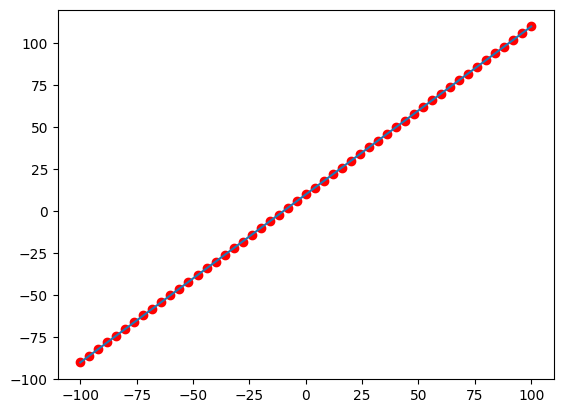

In [22]:
# Visualize the data
plt.plot(X,y)
plt.scatter(X,y,color='r')